In [1]:
from solver import *
from sim_data import *

In [4]:
n_range = [10, 100] + [i for i in range(200, 1800, 200)]
# n_range = [10]
default_time_list, IAAL_time_list, ADMM_time_list = sim_multi(n_range, maxit=200, 
                                                                                  alpha=1e-4, tol=1e-3, seed=42, 
                                                                                  num_avg=5)

--------
size = 10
status: optimal, optimal value: -523.0081048676301
status: optimal, optimal value: -523.0081048676301
0/2000.0
Approximated optimal objective value: -523.2921815746901
status: optimal, optimal value: -475.83096634806463
status: optimal, optimal value: -475.83096634806463
0/2000.0
Approximated optimal objective value: -477.62968631962275
status: optimal, optimal value: -491.003837559836
status: optimal, optimal value: -491.003837559836
0/2000.0
Approximated optimal objective value: -490.68070416117513
status: optimal, optimal value: -490.3796569673893
status: optimal, optimal value: -490.3796569673893
0/2000.0
Approximated optimal objective value: -492.28434356309424
status: optimal, optimal value: -506.7999414357142
status: optimal, optimal value: -506.7999414357142
0/2000.0
Approximated optimal objective value: -506.50311651885505
--------
size = 100
status: optimal, optimal value: -5115.765691808518
status: optimal, optimal value: -5115.765691808518
0/20000.0
Appro

status: optimal, optimal value: -79391.96890311701
status: optimal, optimal value: -79391.96890311701
0/320000.0
Approximated optimal objective value: -79373.5013095351
status: optimal, optimal value: -79401.58979223059
status: optimal, optimal value: -79401.58979223059
0/320000.0
Approximated optimal objective value: -79355.27012846847
status: optimal, optimal value: -85115.64361900803
status: optimal, optimal value: -85115.64361900803
0/320000.0
Approximated optimal objective value: -85113.92905971847
status: optimal, optimal value: -81964.21875192088
status: optimal, optimal value: -81964.21875192088
0/320000.0
10000/320000.0
Approximated optimal objective value: -81956.41040851267


In [5]:
default_time_list, IAAL_time_list, ADMM_time_list

([0.0172269344329834,
  0.14214439392089845,
  0.38469595909118653,
  0.9944920539855957,
  1.9337475299835205,
  3.650180530548096,
  6.149869012832641,
  8.523154926300048,
  13.099509572982788,
  19.67610368728638],
 [],
 [0.5335267543792724,
  1.7598971843719482,
  1.8296972274780274,
  1.2710419654846192,
  1.4162231922149657,
  0.8587864398956299,
  1.3099094867706298,
  2.61428165435791,
  2.6591306209564207,
  2.087877559661865])

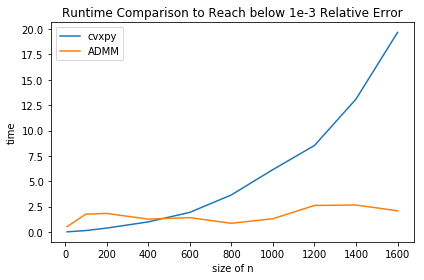

In [8]:
all_lists = [default_time_list, ADMM_time_list]
name = "Runtime Comparison to Reach below 1e-3 Relative Error"
label_list = ["cvxpy", "ADMM"]
plot_util(all_lists, n_range, name, label_list)

In [2]:
n_range = [10, 100] + [i for i in range(200, 1800, 200)]
# n_range = [10]
default_time_list, IAAL_time_list, ADMM_time_list = sim_multi(n_range, maxit=200, alpha=1e-4, tol=1e-3, seed=42, 
                                                              num_avg=5)

--------
size = 10
status: optimal, optimal value: -523.0081048676301
status: optimal, optimal value: -523.0081048676301
0/2000.0
-523.2921815746901
status: optimal, optimal value: -475.83096634806463
status: optimal, optimal value: -475.83096634806463
0/2000.0
-477.62968631962275
status: optimal, optimal value: -491.003837559836
status: optimal, optimal value: -491.003837559836
0/2000.0
-490.68070416117513
status: optimal, optimal value: -490.3796569673893
status: optimal, optimal value: -490.3796569673893
0/2000.0
-492.28434356309424
status: optimal, optimal value: -506.7999414357142
status: optimal, optimal value: -506.7999414357142
0/2000.0
-506.50311651885505
--------
size = 100
status: optimal, optimal value: -5115.765691808518
status: optimal, optimal value: -5115.765691808518
0/20000.0
-5115.698954668678
status: optimal, optimal value: -5387.3802569133095
status: optimal, optimal value: -5387.3802569133095
0/20000.0
-5385.054216285344
status: optimal, optimal value: -4970.31914

In [3]:
default_time_list, IAAL_time_list, ADMM_time_list

([0.01651005744934082,
  0.15102024078369142,
  0.375718355178833,
  0.9601378440856934,
  2.1284796714782717,
  3.460151433944702,
  5.78188123703003,
  8.607836866378785,
  14.739071369171143,
  16.90225496292114],
 [],
 [0.5721732616424561,
  1.5756669521331788,
  1.9616205215454101,
  1.2954654216766357,
  1.6654265880584718,
  0.8700911998748779,
  1.3808497428894042,
  2.6588440895080567,
  2.8772498607635497,
  1.9723842144012451])

In [2]:
default_time_list, IAAL_time_list, ADMM_time_list = ([0.01651005744934082,
  0.15102024078369142,
  0.375718355178833,
  0.9601378440856934,
  2.1284796714782717,
  3.460151433944702,
  5.78188123703003,
  8.607836866378785,
  14.739071369171143,
  16.90225496292114],
 [],
 [0.5721732616424561,
  1.5756669521331788,
  1.9616205215454101,
  1.2954654216766357,
  1.6654265880584718,
  0.8700911998748779,
  1.3808497428894042,
  2.6588440895080567,
  2.8772498607635497,
  1.9723842144012451])

In [11]:
def plot_util(all_lists, x, name, label_list, color_list):
    plt.figure()
    plt.xlabel('n')
    plt.ylabel("time")
    plt.title(name)

    for i in range(len(all_lists)):
        # TODO: check
        y = all_lists[i]
        plt.plot(x, y, label=label_list[i], color=color_list[i])
    plt.legend()
    plt.tight_layout()
    plt.show()

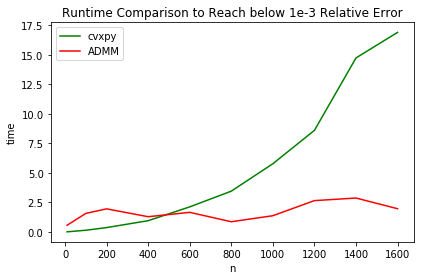

In [12]:
all_lists = [default_time_list, ADMM_time_list]
n_range = [10, 100] + [i for i in range(200, 1800, 200)]
x = n_range
name = "Runtime Comparison to Reach below 1e-3 Relative Error"
label_list = ["cvxpy", "ADMM"]
color_list = ["g", "r"]
plot_util(all_lists, x, name, label_list, color_list)

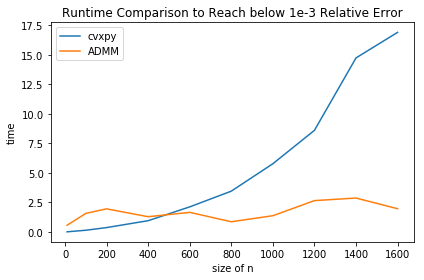

In [5]:
all_lists = [default_time_list, ADMM_time_list]
x = n_range
name = "Runtime Comparison to Reach below 1e-3 Relative Error"
label_list = ["cvxpy", "ADMM"]
plot_util(all_lists, x, name, label_list)

In [7]:
n_range = [10, 100] + [i for i in range(200, 1800, 200)]
# n_range = [10]
default_time_list, IAAL_time_list, ADMM_time_list = sim_multi(n_range, maxit=200, alpha=1e-4, tol=1e-3, seed=42, 
                                                              num_avg=5)

--------
size = 10
status: optimal, optimal value: -523.0081048676301
status: optimal, optimal value: -523.0081048676301
0/2000.0
-523.2921815746953
status: optimal, optimal value: -555.9843650723608
status: optimal, optimal value: -555.9843650723608
0/2000.0
-555.9692273927637
status: optimal, optimal value: -526.9951786066938
status: optimal, optimal value: -526.9951786066938
0/2000.0
-526.9951787190544
status: optimal, optimal value: -574.2008966410725
status: optimal, optimal value: -574.2008966410725
0/2000.0
-584.0470221207693
status: optimal, optimal value: -555.9843650723608
status: optimal, optimal value: -555.9843650723608
0/2000.0
-555.9692273927637
--------
size = 100
status: optimal, optimal value: -4885.463057832918
status: optimal, optimal value: -4885.463057832918
0/20000.0
-4885.366065208545
status: optimal, optimal value: -4961.786999725926
status: optimal, optimal value: -4961.786999725926
0/20000.0
-4960.039962565314
status: optimal, optimal value: -5374.12098470353

In [8]:
default_time_list, IAAL_time_list, ADMM_time_list

([0.015424776077270507,
  0.12391448020935059,
  0.42435460090637206,
  0.944363784790039,
  1.8252589225769043,
  3.594857931137085,
  5.746326875686646,
  8.255272388458252,
  13.348993301391602,
  20.15464653968811],
 [],
 [0.3398937225341797,
  2.172087812423706,
  2.025699806213379,
  0.7840696573257446,
  1.0519804000854491,
  1.6935673713684083,
  2.1003701210021974,
  1.5313533147176106,
  4.4498039245605465,
  1.3887039184570313])

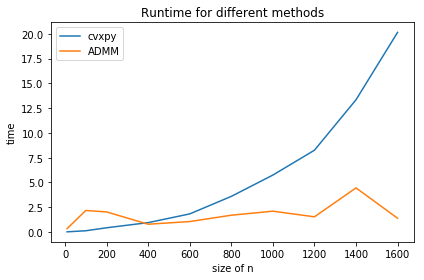

In [9]:
all_lists = [default_time_list, ADMM_time_list]
x = n_range
name = "Runtime for different methods"
label_list = ["cvxpy", "ADMM"]
plot_util(all_lists, x, name, label_list)

In [3]:
default_time_list, IAAL_time_list, ADMM_time_list

([0.01665778160095215,
  0.13747682571411132,
  0.2997716426849365,
  1.0830878257751464,
  2.059067726135254,
  3.8510679721832277,
  5.826599645614624,
  8.225278234481811,
  14.136742544174194,
  20.712745046615602],
 [0.27231392860412595,
  5.017393398284912,
  11.668120193481446,
  26.66370234489441,
  35.449979639053346,
  48.912220525741574,
  58.95455503463745,
  68.73302416801452,
  87.96985960006714,
  106.08670024871826],
 [0.3883089542388916,
  2.106606149673462,
  1.680257511138916,
  6.990504932403565,
  1.2905801773071288,
  1.703009843826294,
  2.3210657596588136,
  28.714737701416016,
  4.701895904541016,
  1.509003210067749])

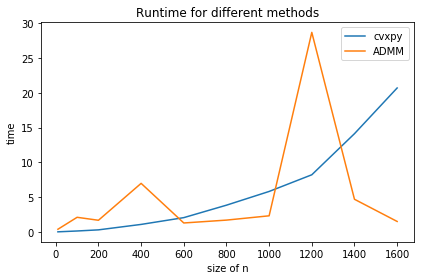

In [9]:
all_lists = [default_time_list, ADMM_time_list]
x = n_range
name = "Runtime for different methods"
label_list = ["cvxpy", "ADMM"]
plot_util(all_lists, x, name, label_list)

In [7]:
primal_err_list, lambda_err_list, duality_gap_list, total_time, _ = sim_once(100, maxit=200, alpha=1e-4, strategy="IAAL", 
                                                                          tol=3e-3)

status: optimal, optimal value: -5121.257564136352
0/20000.0
10000/20000.0
-5108.984471845698


In [15]:
len(lambda_err_list)

51

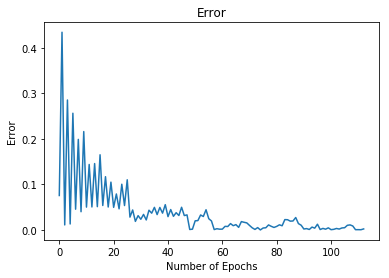

In [8]:
plot_error(primal_err_list)

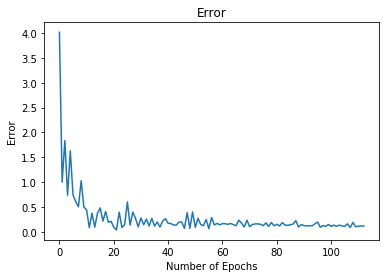

In [9]:
plot_error(lambda_err_list)

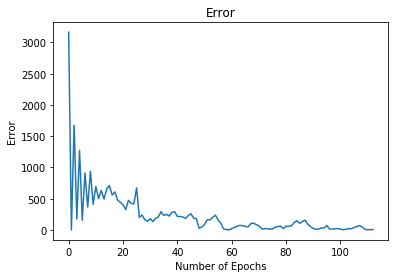

In [10]:
plot_error(duality_gap_list)

In [43]:
duality_gap_list

[2018.1642670716483,
 73.84807995601307,
 101.09985364934283,
 98.2096780588261,
 66.71535861021422,
 17.29489668259208,
 39.89118670326836]

In [3]:
# initialization
# we know the solution to this simple problem is x*=[100,0,...,0]
n = 100
c = np.array([[2.]] + [[1.] for i in range(n - 1)])
M = np.array([[[1.]] for i in range(n)])
A = np.array([[[1.]] for i in range(n)])
d = np.array([float(n)])
b = np.array([[float(n)] for i in range(n)])

In [4]:
# find the optimal solution using the blackbox solver
# the sign of c is negated because we want to convert a max problem to an equivalent min one
argmin_x, lambda_star, optimal_obj = primal_dual_solver(-c, M, A, d, b)
print(argmin_x)

status: optimal, optimal value: -199.9999999994306
[1.00000000e+02 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.19450217e-12 6.19450217e-12
 6.19450217e-12 6.19450217e-12 6.1

In [8]:
# find the solution to the same problem using our solver
# the optimal_obj, which is the optimal value of the objective function, needs to be passed in as a stopping criterion
rs = general_st_sampling_solver(c, M, A, d, b, epoch=50, batch_size=1, alpha=1e-3,
                                augmented=True, prox_type="ADMM",
                                ascent_type="vr",
                                is_rep=False, is_cyc=False,
                                optimal_obj=optimal_obj, is_tracking=True)
print(rs)

AssertionError: dual optimal solution required